# Famous Last Words
The dataset documents Texas death row inmates executed from 1976, when the Supreme Court reinstated the death penalty, to the present. It was extracted from the Texas Department of Criminal Justice website.

Source: https://selectstarsql.com/frontmatter.html#dataset

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import numpy as np
import nltk
matplotlib.rcParams['pdf.fonttype'] = 42 #makes text editable in illustrator

%matplotlib inline

In [2]:
df = pd.read_csv("tx_deathrow_full.csv")

In [51]:
df.sort_values(by='Highest Education Level', ascending=True)

,Execution,Date of Birth,Date of Offence,Highest Education Level,Last Name,First Name,TDCJ Number,Age at Execution,Date Received,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State,Last Statement,Full Name,Year
56,497,1977-10-18,2003-01-11,3.0,Parr,Carroll,999479,35,2004-06-04,2013-05-07,Black,McLennan,Brown,178.0,"5' 7""",McLennan,Texas,First of all; Shonna talk to your brother. He'...,Carroll Parr,2013
386,167,1946-10-17,1985-07-27,3.0,Vega,Martin,932,52,1989-02-16,1999-01-26,Hispanic,Caldwell,Brown,165.0,"5' 10""",Caldwell,Texas,I really don't have much to say. All I want to...,Martin Vega,1999
39,514,1969-10-05,1997-10-15,4.0,Hernandez,Ramiro,999342,44,2000-02-11,2014-04-09,Hispanic,Kerr,Brown,190.0,"5' 2""",Tamaulipas,Mexico,"Yes, sir. First I would like to thank God for ...",Ramiro Hernandez,2014
133,420,1961-12-14,1993-04-02,5.0,Taylor,Elkie,999112,46,1994-07-26,2008-11-06,Black,Tarrant,Brown,168.0,"5' 9""",Milwaukee,Wisconsin,"Hello, ain't got to worry about nothing. I am ...",Elkie Taylor,2008
180,373,1961-11-17,1994-05-10,5.0,Hinojosa,Richard,999246,43,1997-12-09,2006-08-17,Hispanic,Bexar,Green,224.0,"5' 10""",Bexar,Texas,"Yes sir, to my family and children, I love you...",Richard Hinojosa,2006
479,74,1955-12-09,1986-08-18,5.0,Beavers,Richard,916,39,1988-10-18,1994-04-04,White,Harris,Brown,200.0,"5' 11""",Alexander,Virginia,NaN,Richard Beavers,1994
422,131,1967-06-03,1985-11-17,5.0,Montoya,Irineo,847,29,1986-10-20,1997-06-18,Hispanic,Cameron,Brown,140.0,"5' 8""",Tampico,Mexico,Goodbye.I will wait for you in Heaven. I will ...,Irineo Montoya,1997
236,317,1945-07-30,1993-03-12,6.0,Vickers,Billy,999087,58,1994-01-04,2004-01-28,White,Lamar,Blue,191.0,"5' 7""",Hunt,Texas,Yes. I would just like to say to my family tha...,Billy Vickers,2004
32,521,1962-05-18,2000-12-24,6.0,Newbury,Donald,999403,53,2002-01-28,2015-02-04,White,Dallas,Brown,215.0,"6' 0""",Bernalillo,New Mexico,That each new indignity defeats only the body....,Donald Newbury,2015
98,455,1969-03-04,1998-09-08,6.0,Varga,Kevin,999368,41,2000-11-20,2010-05-12,White,Hunt,Brown,203.0,"5' 8""",Kalamazoo,Michigan,I am going to start with the victim's family. ...,Kevin Varga,2010


In [4]:
df.dtypes

Execution                    int64
Date of Birth               object
Date of Offence             object
Highest Education Level    float64
Last Name                   object
First Name                  object
TDCJ\nNumber                 int64
Age at Execution             int64
Date Received               object
Execution Date              object
Race                        object
County                      object
Eye Color                   object
Weight                     float64
Height                      object
Native County               object
Native State                object
Last Statement              object
dtype: object

## Youngest Inmates Executed

In [5]:
df["Full Name"] = df['First Name'] + " " + df['Last Name']

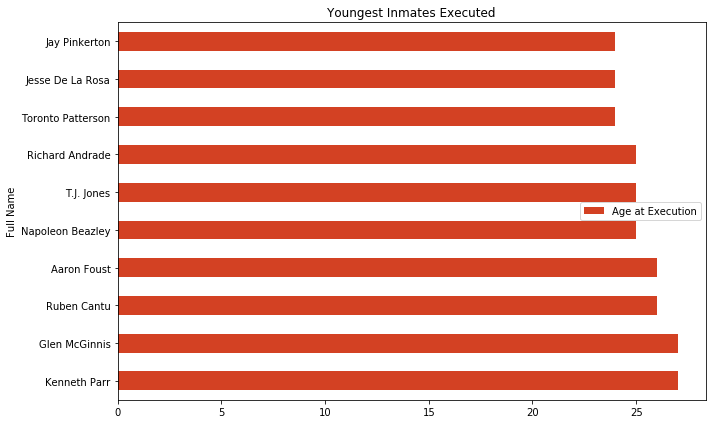

In [9]:
young = df.sort_values(by='Age at Execution', ascending=True).head(10)
young.sort_values(by='Age at Execution', ascending=False).plot(x='Full Name', 
                                                               y='Age at Execution', 
                                                               kind='barh', 
                                                               figsize=(10, 6),
                                                               title="Youngest Inmates Executed",
                                                               color="#D34123")
plt.tight_layout()
plt.savefig("young.pdf")

## Year with the Most Executions


In [6]:
#Make a year only column
df['Year'] = df['Execution Date'].str.replace('(-.*)', '', regex = True).astype(int)

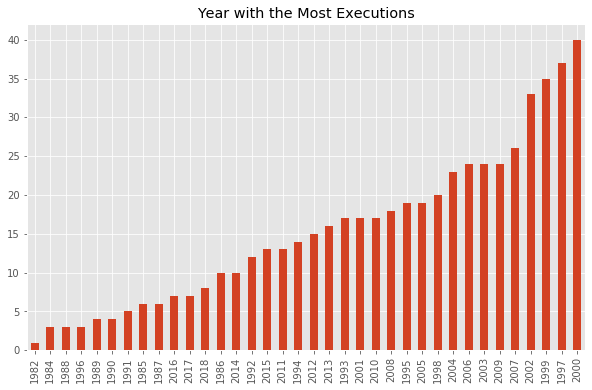

In [27]:
df['Year'].value_counts(ascending=True).plot(kind='bar', 
                                             figsize=(10, 6),
                                             title="Year with the Most Executions",
                                             color="#D34123")

In [10]:
df['Year'].value_counts()

2000    40
1997    37
1999    35
2002    33
2007    26
2009    24
2003    24
2006    24
2004    23
1998    20
2005    19
1995    19
2008    18
2010    17
2001    17
1993    17
2013    16
2012    15
1994    14
2011    13
2015    13
1992    12
2014    10
1986    10
2018     8
2017     7
2016     7
1987     6
1985     6
1991     5
1990     4
1989     4
1996     3
1988     3
1984     3
1982     1
Name: Year, dtype: int64

## Education Level vs Age at Execution

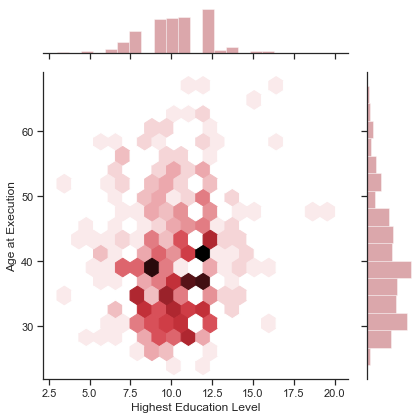

In [41]:
import numpy as np
import seaborn as sns
sns.set(style="ticks")

sns.jointplot(data=df, x='Highest Education Level', y='Age at Execution', kind="hex", color="#A5252D")

plt.tight_layout()
plt.savefig("edu.pdf")

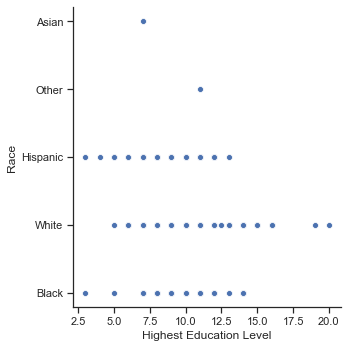

In [8]:
# Race x Edu
sns.relplot(data=df, x='Highest Education Level', y='Race')

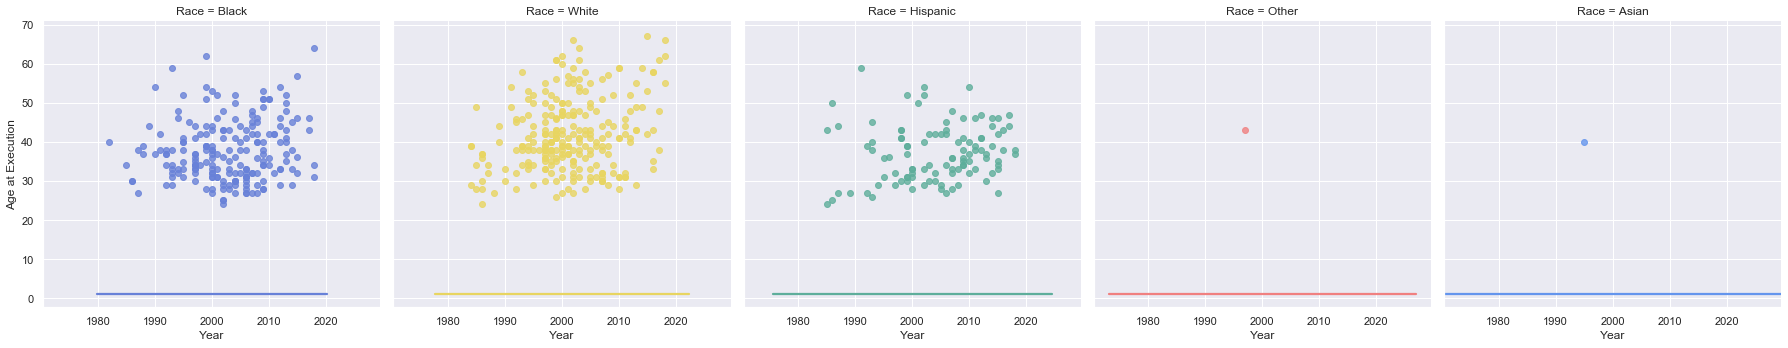

In [29]:
# Race x Age at Exec.
pal = dict(Asian="#6495ED", Other="#F08080", Hispanic="#5EAE9B", White="#E8D561", Black="#6881D8")

g = sns.lmplot(x="Year", y="Age at Execution", col="Race", hue="Race", data=df,
               palette=pal, y_jitter=.02, logistic=True)

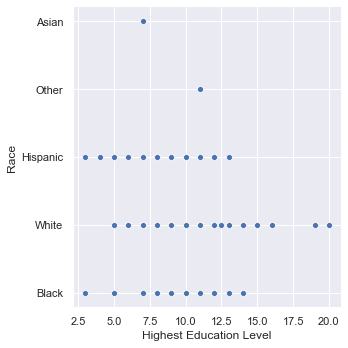

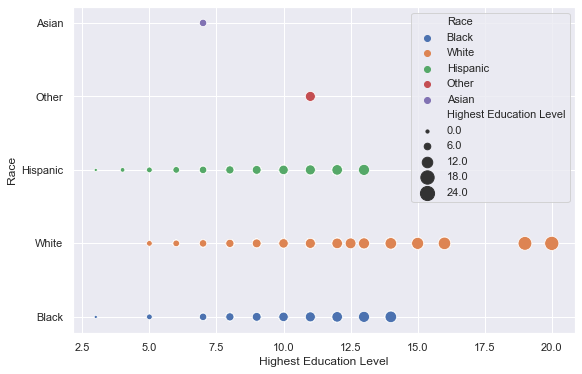

In [36]:
sns.relplot(data=df, x='Highest Education Level', y='Race')
f, ax = plt.subplots(figsize=(9, 6))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Highest Education Level", y="Race",
                     hue="Race", size="Highest Education Level", sizes=(10, 200),
                     data=df)

## Executions by race 
#### Pie Chart


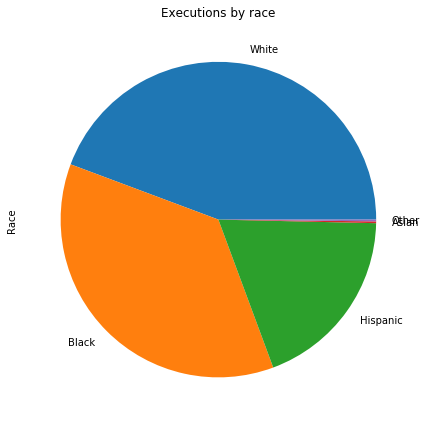

In [18]:
race = df['Race'].value_counts(normalize=True) * 100
race.plot(kind='pie', figsize=(10, 6), title="Executions by race")
plt.tight_layout()
plt.savefig("race.pdf")

In [16]:
race

White       44.303797
Black       36.347197
Hispanic    18.987342
Asian        0.180832
Other        0.180832
Name: Race, dtype: float64

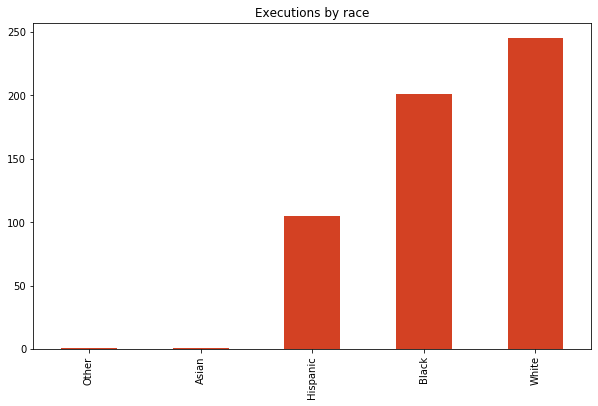

In [17]:
df['Race'].value_counts(ascending=True).plot(kind='bar',
                                             figsize=(10, 6),
                                             title="Executions by race",
                                             color="#D34123")

## Most common level of education


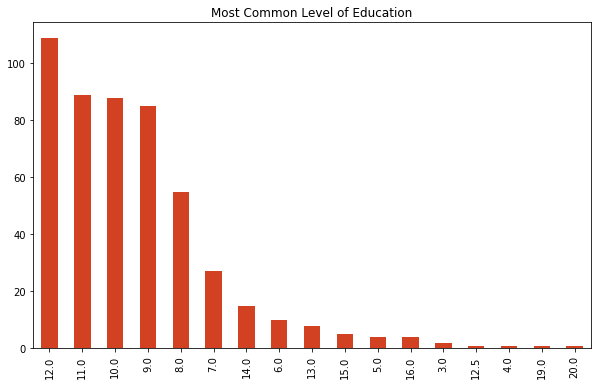

In [12]:
df['Highest Education Level'].value_counts().plot(kind='bar', 
                                                  figsize=(10, 6),
                                                  title="Most Common Level of Education",
                                                  color="#D34123")

## Most common (unique) last words
### Word Cloud

In [47]:
cloud = df['Last Statement'].str.split(expand=True).stack().value_counts()

I                 3425
to                1634
and               1380
the               1282
you               1189
my                 895
for                838
that               751
love               721
of                 718
all                557
am                 525
have               515
a                  507
is                 500
in                 491
me                 393
your               322
know               317
not                315
will               314
be                 306
you.               290
this               278
it                 246
want               245
would              242
with               238
like               236
me.                226
                  ... 
County.              1
destroy              1
transpire            1
Wes                  1
must,                1
salvation,           1
polygraph            1
free-world           1
fast.                1
Jr.,                 1
What's               1
1991                 1
beings.    

All frequencies, including STOPWORDS:
      Word  Frequency
0        .       4528
1        i       3765
2        ,       2528
3      you       1801
4       to       1787
5      and       1472
6      the       1371
7       my        953
8     that        908
9      for        875
10    love        789
11     all        739
12      of        721
13      me        691
14      am        536
15      is        529
16    have        528
17       a        521
18      in        510
19      it        495
20    this        421
21  family        361
22      do        350
23     not        349
24     n't        346
25    know        345
26      be        342
27    your        328
28    will        319
29      's        316


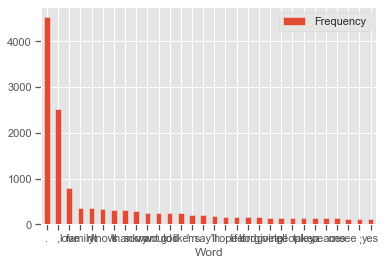

In [43]:
top_N = 30

txt = df['Last Statement'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)

## Which county in Texas has the most death row inmates
#### Choropleth

In [42]:
texas = df[df['Native State'] == 'Texas']
tx = texas['Native County'].value_counts(normalize=True) * 100
tx

Harris            21.893491
Dallas            12.721893
Bexar              8.875740
Tarrant            7.692308
Jefferson          2.958580
Nueces             2.071006
Potter             1.775148
Travis             1.775148
McLennan           1.775148
Brazos             1.479290
Hidalgo            1.479290
Lubbock            1.479290
Cameron            1.183432
El Paso            1.183432
Smith              1.183432
Wichita            0.887574
Gregg              0.887574
Lamar              0.887574
Galveston          0.887574
Williamson         0.887574
Scurry             0.591716
Tom Green          0.591716
Hays               0.591716
Grimes             0.591716
Anderson           0.591716
Leon               0.591716
Eastland           0.591716
Bell               0.591716
Marion             0.591716
Hunt               0.591716
                    ...    
Wharton County     0.295858
Colorado           0.295858
Cherokee           0.295858
Red River          0.295858
Webb               0

In [40]:
tx.to_csv('tx_counties.csv', index=True, header=True)


In [45]:
cloud.to_csv('cloud.csv', index=True, header=True)
